<a href="https://colab.research.google.com/github/vanshT1120/Climate-Change-ML-Project/blob/main/climate_change_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from subprocess import check_output

In [3]:
CO2_df = pd.read_csv('/content/archive.csv')
temp_by_city = pd.read_csv('/content/GlobalLandTemperaturesByCity.csv')
temp_by_country = pd.read_csv('/content/TemperaturesByCountry.csv')
temp_by_major_city = pd.read_csv('/content/TemperaturesByMajorCity.csv')
temp_by_state = pd.read_csv('/content/TemperaturesByState.csv')
global_temp = pd.read_csv('/content/GlobalTemperatures.csv')

In [4]:
CO2_df.head()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958,1,1958.0411,NaN,NaN,NaN,NaN
1,1958,2,1958.1260,NaN,NaN,NaN,NaN
2,1958,3,1958.2027,315.69,314.42,316.18,314.89
3,1958,4,1958.2877,317.45,315.15,317.30,314.98
4,1958,5,1958.3699,317.50,314.73,317.83,315.06


In [5]:
temp_by_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [6]:
temp_by_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [7]:
temp_by_major_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [8]:
temp_by_state.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [9]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Dropping all NaN values
CO2_df = CO2_df.dropna()
temp_by_city = temp_by_city.dropna()
temp_by_country = temp_by_country.dropna()
temp_by_major_city = temp_by_major_city.dropna()
temp_by_state = temp_by_state.dropna()
global_temp = global_temp.dropna()

In [15]:
# Modify the date format so I could only use the year
def to_year(date):
    # returns year from date time

    for i in [date]:
        first = i.split('-')[0]
        return int(first)


# Applying the date modification and creating a new column in the dataset called year
temp_by_state['year'] = temp_by_state['dt'].apply(to_year)

# Collecting only data of the United States
dfs = temp_by_state[temp_by_state['Country'] == 'United States']

# Collecting the average temperature per year
dfa = []
years = dfs['year'].unique()
for i in years:
    df_avg = dfs[dfs['year'] == i]['AverageTemperature'].mean()
    df_new = (dfs[dfs['year'] == i]).head(1)
    df_new['AverageTemperature'] = df_avg
    dfa.append(df_new)
dfa = pd.concat(dfa, ignore_index=True)
dfa.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,year
0,1743-11-01,4.544966,2.898,Alabama,United States,1743
1,1744-04-01,12.837651,2.902,Alabama,United States,1744
2,1745-01-01,2.649112,2.838,Alabama,United States,1745
3,1750-01-01,11.339737,2.724,Alabama,United States,1750
4,1751-01-01,12.039267,2.847,Alabama,United States,1751


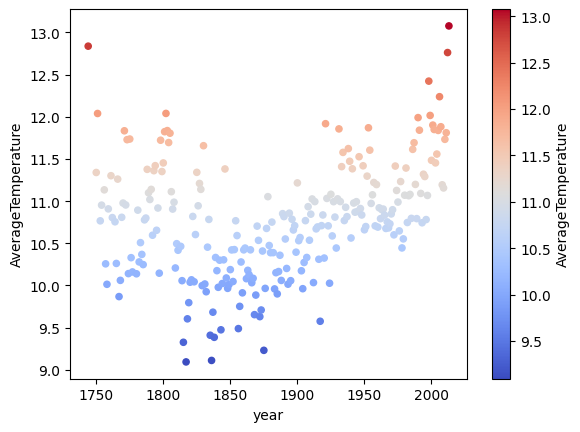

In [26]:
# Average Temperature above 9 degrees
df_nine = dfa[dfa['AverageTemperature'] >= 9]
df_nine.plot.scatter(x='year', y='AverageTemperature', c = 'AverageTemperature', cmap ='coolwarm')
plt.show()

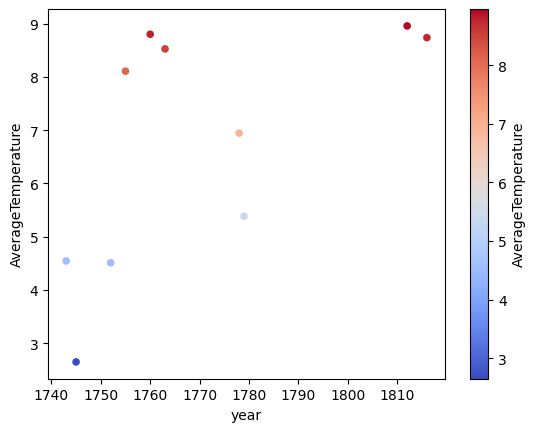

In [25]:
# Average Temperature below 9 degrees
df_nine = dfa[dfa['AverageTemperature'] <= 9]
df_nine.plot.scatter(x='year', y='AverageTemperature', c = 'AverageTemperature', cmap ='coolwarm')
plt.show()

In [20]:
new_co2_df = CO2_df

dfc = []

# Collecting all of the unique years
years = CO2_df['Year'].unique()

for i in years:
    df_avg = CO2_df[CO2_df['Year'] == i]['Carbon Dioxide (ppm)'].mean()
    df_new = (CO2_df[CO2_df['Year'] == i]).head(1)
    df_new['Carbon Dioxide (ppm)'] = df_avg
    dfc.append(df_new)
dfc = pd.concat(dfc, ignore_index=True)

# Changing the Year column to year (lowercase)
dfc.rename(index=str, columns={"Year": "year"}, inplace=True)


# Dropping all of the unwanted columns
dfc.drop(['Seasonally Adjusted CO2 (ppm)', 'Carbon Dioxide Fit (ppm)', 'Seasonally Adjusted CO2 Fit (ppm)', 'Decimal Date', 'Month'], inplace=True, axis=1)

In [23]:
dfc = dfc.dropna()
dfc.head()

,year,Carbon Dioxide (ppm)
0,1958,315.330000
1,1959,315.981667
2,1960,316.908333
3,1961,317.645000
4,1962,318.453333


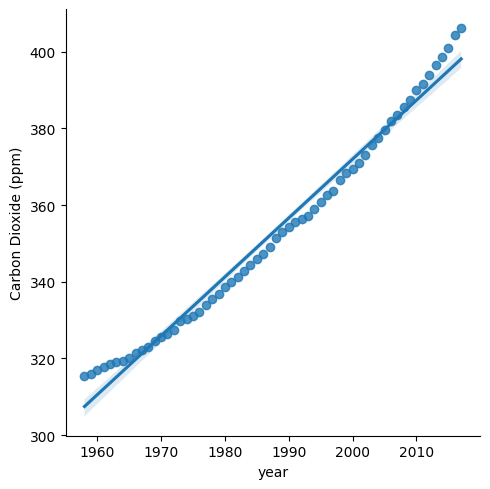

In [24]:
sns.lmplot(x='year', y='Carbon Dioxide (ppm)', data=dfc)
plt.show()

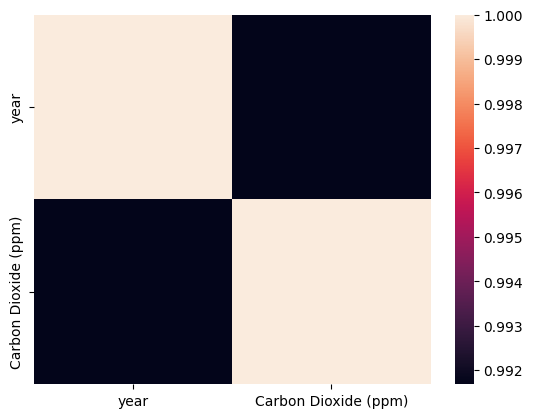

In [27]:
sns.heatmap(dfc.corr())
plt.show()

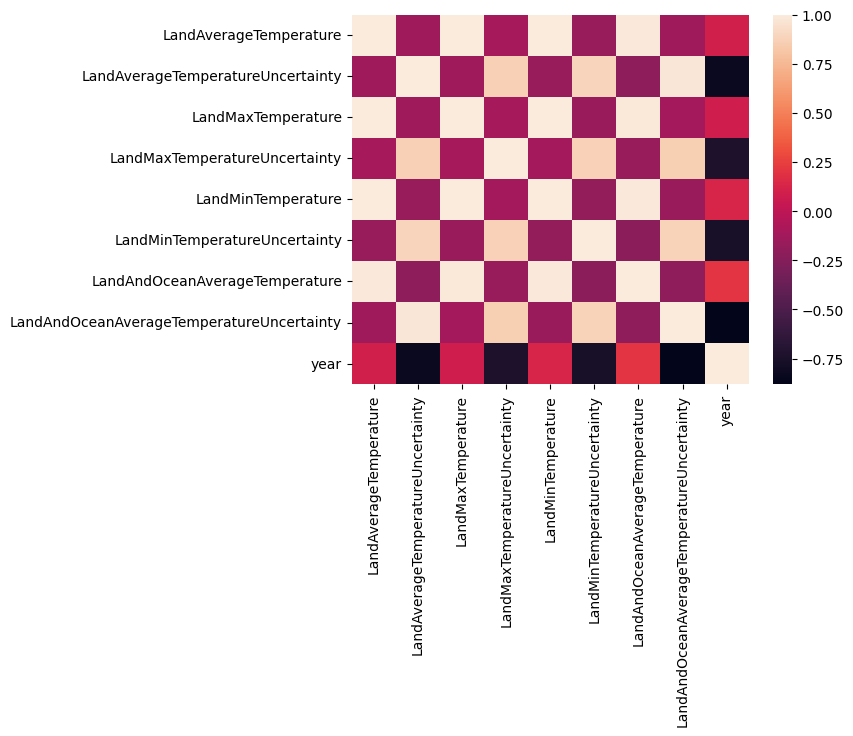

In [29]:
# Convert 'dt' column to datetime objects
global_temp['dt'] = pd.to_datetime(global_temp['dt'])

# Extract year from 'dt' and create a new 'year' column
global_temp['year'] = global_temp['dt'].dt.year

# Select only numeric columns for correlation calculation
numeric_cols = global_temp.select_dtypes(include=np.number).columns

# Calculate correlation using only numeric columns
sns.heatmap(global_temp[numeric_cols].corr())
plt.show()

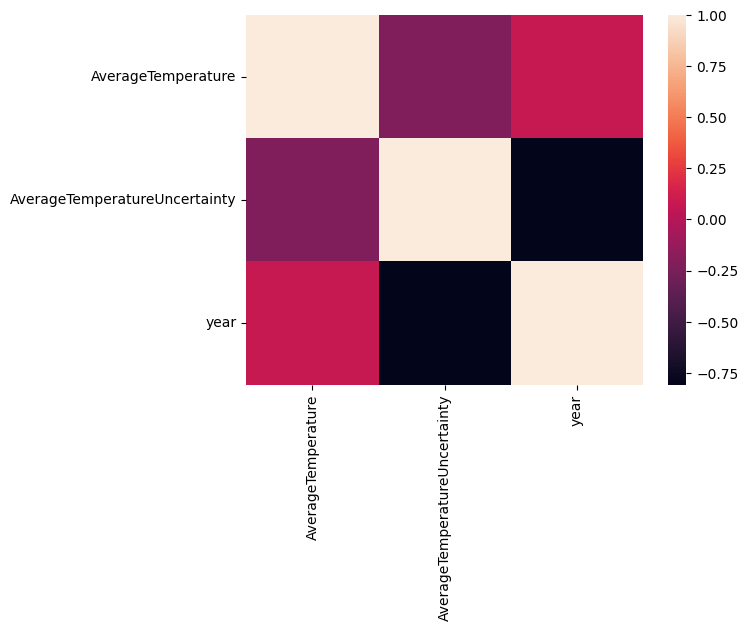

In [31]:
# Convert 'dt' column to datetime objects
temp_by_state['dt'] = pd.to_datetime(temp_by_state['dt'])

# Extract year from 'dt' and create a new 'year' column
temp_by_state['year'] = temp_by_state['dt'].dt.year

# Select only numeric columns for correlation calculation
numeric_cols = temp_by_state.select_dtypes(include=np.number).columns

# Calculate correlation using only numeric columns
sns.heatmap(temp_by_state[numeric_cols].corr())
plt.show()

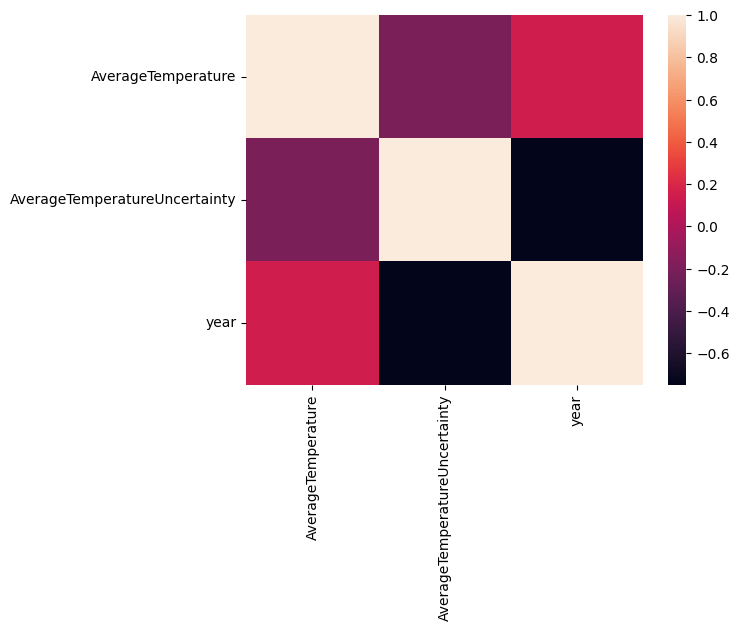

In [35]:
# changing 'dt' column to date time object
temp_by_major_city['dt'] = pd.to_datetime(temp_by_major_city['dt'])

# Extract year from 'dt' and create a new 'year' column
temp_by_major_city['year'] = temp_by_major_city['dt'].dt.year

numeric_cols = temp_by_major_city.select_dtypes(include=np.number).columns

sns.heatmap(temp_by_major_city[numeric_cols].corr())
plt.show()

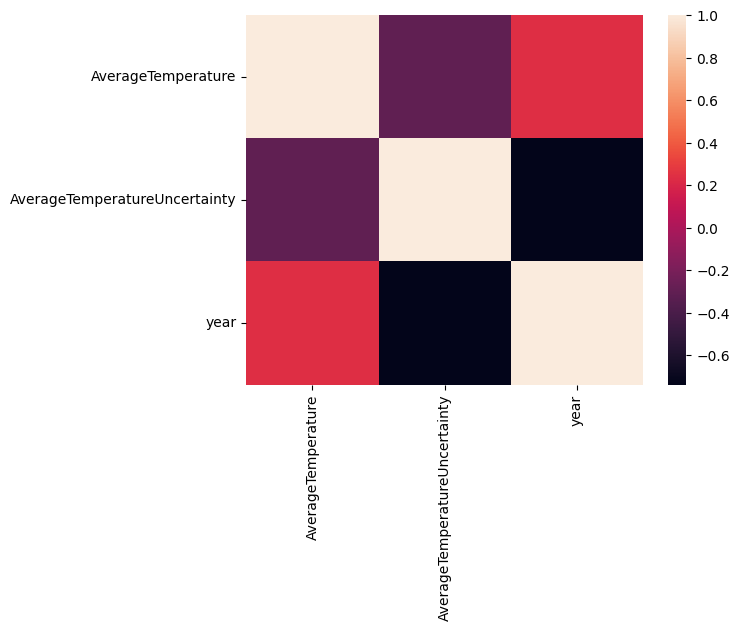

In [36]:
# changing 'dt' column to datetime object
temp_by_country['dt'] = pd.to_datetime(temp_by_country['dt'])

temp_by_country['year'] = temp_by_country['dt'].dt.year

numeric_cols = temp_by_country.select_dtypes(include=np.number).columns

sns.heatmap(temp_by_country[numeric_cols].corr())
plt.show()

In [38]:
CO2_df.rename(index=str, columns={"Year": "year"}, inplace=True)

dfsc = pd.merge(dfa, CO2_df, on=['year']).dropna()

dfsc.drop(['Seasonally Adjusted CO2 (ppm)', 'Carbon Dioxide Fit (ppm)', 'Seasonally Adjusted CO2 Fit (ppm)', 'Decimal Date', 'Month'], inplace=True, axis=1)

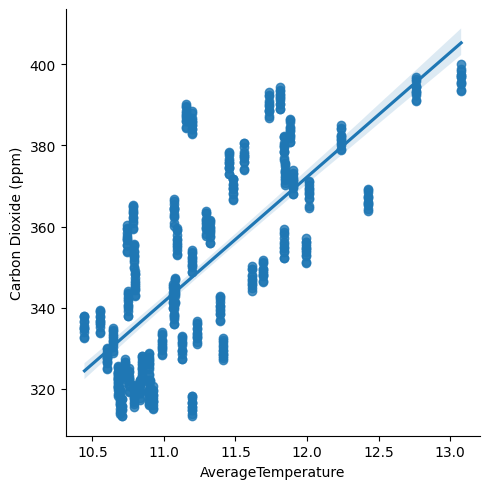

In [39]:
sns.lmplot(x='AverageTemperature', y='Carbon Dioxide (ppm)', data = dfsc)
plt.show()

In [46]:
import plotly.offline as py
import plotly.graph_objs as go
import datetime as dt

grp1 = CO2_df.groupby(["year"]).mean()["Carbon Dioxide (ppm)"]
trace1 = go.Bar(x=grp1.index, y=grp1.values)
layout = go.Layout(title="Average CO<sub>2</sub> Levels in Atmosphere per month",yaxis=dict(title="Parts per million (PPM)", range=(300,420)),xaxis=dict(title ="year"))
figure = go.Figure(data=[trace1], layout=layout)
py.iplot(figure, filename="co2-ppm-year")

In [42]:
group2 = CO2_df.groupby(["year", "Month"]).mean()["Carbon Dioxide (ppm)"]
x = [dt.datetime(year=i[0], month=i[1], day=15) for i in group2.index]

# Mean values.
y1 = group2.values

# Rolling window average
y2 = group2.rolling(3, min_periods=1).mean().values

# Exponentially weighted moving average
y3 = group2.ewm(span=3, min_periods=1).mean().values

In [48]:
second_trace = go.Scatter(x=x, y=y1, mode="markers", name="Actual value")
third_trace = go.Scatter(x=x, y=y2, line=dict(color="red"), name="Rolling average")
forth_trace = go.Scatter(x=x, y=y3, line=dict(color="green"), name="EWM average")

default_period = (dt.datetime(2008, 1, 1), dt.datetime(2017,12,1))
default_ppm_range = (380, 410)
layout = go.Layout(
    title="Seasonal fluctations of CO<sub>2</sub> levels in atmosphere",
    yaxis=dict(title="Parts per million (PPM)",range=default_ppm_range),
    xaxis=dict(title="Year", range=default_period))

figure = go.Figure(data=[second_trace, third_trace, forth_trace], layout=layout)
py.iplot(figure, filename="co2-ppm-seasonal")

In [49]:
from sklearn import linear_model
from sklearn.model_selection  import train_test_split

x_val = [ (i.year, i.month, i.month ** 2, i.year ** 2) for i in x]
y_val = [ i for i in y1 ]

x_train, x_test, y_train, y_test = train_test_split(x_val, y_val, test_size=0.40, random_state=45)
linearModel = linear_model.LinearRegression().fit(x_train, y_train)
print("Accuracy: ", linearModel.score(x_test, y_test))

# predicted values
pred_value = linearModel.predict(x_val)

Accuracy:  0.996044541845813


In [50]:
# Defining timeline of years
predicted_years = range(1950, 2055)
predicted_months = range(1, 13)

predicted_x = []
for y in predicted_years:
    for j in predicted_months:
        predicted_x.append([y, j, j ** 2, y ** 2])

# Predict values
predicted_y = linearModel.predict(predicted_x)


x_plot = [dt.datetime(i[0], i[1], 15) for i in predicted_x]
fifth_trace = go.Scatter(x=x_plot, y=predicted_y, line=dict(color="red"), name="Predicted value")

period_default = dt.datetime(1956, 1, 1), dt.datetime(2050,12,1)
ppm_range_def = (300, 500)
layout = go.Layout(
    title="Predicted Vs. Actual CO<sub>2</sub> Concentration levels",
    yaxis=dict(title="Parts per million (PPM)", range=ppm_range_def),
    xaxis=dict(title="Year", range=period_default))
figure = go.Figure(data=[second_trace, fifth_trace], layout=layout)
py.iplot(figure, filename="co2-ppm-prediction")

In [51]:
# State that had the highest average temperature level
temp_by_state.loc[temp_by_state['AverageTemperature'].idxmax()]

,116037
dt,2012-06-01 00:00:00
AverageTemperature,36.339
AverageTemperatureUncertainty,0.385
State,Delhi
Country,India
year,2012


In [52]:
# Country that had the highest Average Temperature
temp_by_country.loc[temp_by_country['AverageTemperature'].idxmax()]

,284851
dt,2012-07-01 00:00:00
AverageTemperature,38.842
AverageTemperatureUncertainty,0.464
Country,Kuwait
year,2012


In [53]:
temp_by_state.loc[temp_by_state['AverageTemperatureUncertainty'].idxmax()]

,202908
dt,1768-01-01 00:00:00
AverageTemperature,-9.102
AverageTemperatureUncertainty,12.646
State,Kaliningrad
Country,Russia
year,1768


In [57]:
def mod_year(date):
    # returns year from date time
        return date.year

def mod_month(date):
    # returns month from date time
        return date.month

In [65]:
temp_by_country['year'] = temp_by_country['dt'].apply(mod_year)
temp_by_country['month'] = temp_by_country['dt'].apply(mod_month)

country_new_temp_data = pd.merge(temp_by_country, CO2_df, on=['year'])

# Convert 'Carbon Dioxide (ppm)' column to numeric, forcing non-numeric to NaN
country_new_temp_data['Carbon Dioxide (ppm)'] = pd.to_numeric(country_new_temp_data['Carbon Dioxide (ppm)'], errors='coerce')

# Drop rows with NaN values in 'Carbon Dioxide (ppm)' column
country_new_temp_data = country_new_temp_data.dropna(subset=['Carbon Dioxide (ppm)'])

country_carbon = country_new_temp_data.groupby(["year", "month"])["Carbon Dioxide (ppm)"].mean()

# country_carbon = country_new_temp_data.groupby(["year", "month"])["Carbon Dioxide (ppm)"].apply(lambda x: pd.to_numeric(x, errors='coerce').mean())
xx = [dt.datetime(year=i[0], month=i[1], day=15) for i in country_carbon.index]

# Mean values.
yy1 = country_carbon.values

# Rolling window average
yy2 = country_carbon.rolling(3, min_periods=1).mean().values

# Exponentially weighted moving average
yy3 = country_carbon.ewm(span=3, min_periods=1).mean().values

In [66]:
second_country_trace = go.Scatter(x=xx, y=yy1, mode="markers", name="Actual value")
third_country_trace = go.Scatter(x=xx, y=yy2, line=dict(color="red"), name="Rolling average")
forth_country_trace = go.Scatter(x=xx, y=yy3, line=dict(color="green"), name="EWM average")

x_values = [ (i.year, i.month, i.month ** 2, i.year ** 2) for i in x]
y_values = [ i for i in y1 ]

x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.40, random_state=45)
linearModel = linear_model.LinearRegression().fit(x_train, y_train)
print ("Accuracy: ", linearModel.score(x_test, y_test))

# predicted values
pred_value = linearModel.predict(x_values)

Accuracy:  0.996044541845813


In [68]:
# country_new_temp_data['Country'].unique()
df1 = country_new_temp_data.groupby(['Country'])

df2= df1.apply(lambda x: x.sort_values(["Carbon Dioxide (ppm)"]))

df3=df2.reset_index(drop=True)
df3.head()

<ipython-input-68-2ec40b1b087d>:4: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,month,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958-11-01,5.400,0.678,Afghanistan,1958,11,9,1958.7068,313.21,316.06,312.48,315.35
1,1958-12-01,4.662,0.439,Afghanistan,1958,12,9,1958.7068,313.21,316.06,312.48,315.35
2,1958-08-01,24.639,0.436,Afghanistan,1958,8,9,1958.7068,313.21,316.06,312.48,315.35
3,1958-09-01,21.086,0.463,Afghanistan,1958,9,9,1958.7068,313.21,316.06,312.48,315.35
4,1958-04-01,16.592,0.350,Afghanistan,1958,4,9,1958.7068,313.21,316.06,312.48,315.35


In [69]:
new_predicted_x = []
for y in predicted_years:
    for j in predicted_months:
        new_predicted_x.append([y, j, j ** 2, y ** 2])

# Predict values
new_predicted_y = linearModel.predict(new_predicted_x)


new_x_plot = [dt.datetime(i[0], i[1], 15) for i in new_predicted_x]
fifth_new_trace = go.Scatter(x=new_x_plot , y=new_predicted_y, line=dict(color="red"), name="Predicted value")

layout = go.Layout(
    title="Predicted Vs. Actual CO<sub>2</sub> Concentration levels",
    yaxis=dict(title="Parts per million (PPM)", range=ppm_range_def),
    xaxis=dict(title="Year", range=period_default))
figure = go.Figure(data=[second_country_trace, fifth_new_trace], layout=layout)
py.iplot(figure, filename="co2-ppm-prediction")